In [1]:
import os
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat
import utils
%matplotlib inline


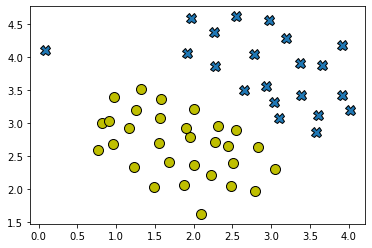

In [2]:
data = loadmat(os.path.join('Data', 'ex6data1.mat'))

X, y = data['X'], data['y'][:,0]

utils.plotData(X,y)

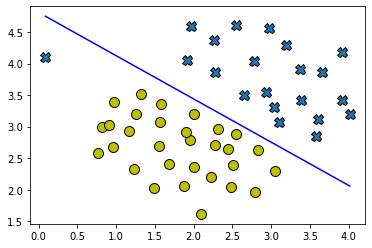

In [3]:
C =1
model = utils.svmTrain(X,y,C, utils.linearKernel, 1e-3, 20)

utils.visualizeBoundaryLinear(X, y, model)

In [4]:
def gaussianKernel(x1, x2, sigma):
    
    
    sim = 0
    
    
    return sim
    
    

In [5]:
x1 = np.array([1,2,1])

x2 = np.array([0,4,-1])

sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian kernel between x1 = [1,2,1], x2 =[0,4,-1],sigma = %0.2f:'
      '\n\t%f\n(for sigma =2, this value should be about 0.324652)\n' %(sigma,sim))

Gaussian kernel between x1 = [1,2,1], x2 =[0,4,-1],sigma = 2.00:
	0.000000
(for sigma =2, this value should be about 0.324652)



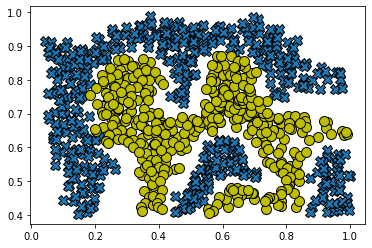

In [6]:
data = loadmat(os.path.join('Data', 'ex6data2.mat'))

X,y = data['X'], data['y'][:,0]

utils.plotData(X,y)

C:\Users\asus\Desktop\ML_NEW_SPECALIZATION\SVM\MAIN EXAMPLE\utils.py:299: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)


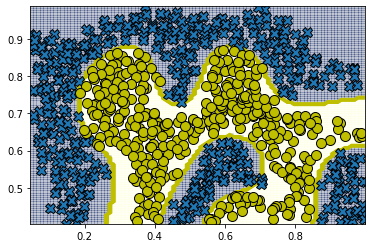

In [7]:
C=1
sigma = 0.1

model = utils.svmTrain(X,y,C, gaussianKernel, args = (sigma,))
utils.visualizeBoundary(X,y,model)

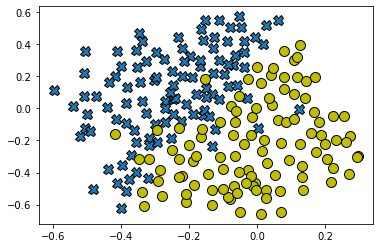

In [8]:
data = loadmat(os.path.join('Data', 'ex6data3.mat'))

X, y, Xval, yval = data['X'], data['y'][:,0], data['Xval'], data['yval'][:,0]

utils.plotData(X,y)

In [9]:
def dataset3Params(X, y, Xval, yval):
    
    C=1
    sigma = 0.3
    
    
    C_array = np.array([0.01,0.03, 0.1,0.3, 1, 3, 10,30])
    sigma_array = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    
    my_array = np.zeros([C_array.size, sigma_array.size])
    err_array = np.empty(shape=(8,8))
    
    for i in np.arange(C_array.size):
        for j in np.arange(sigma_array.size):
            model = utils.svmTrain(X, y, C_array[i], gaussianKernel, args=(sigma_array[j],))
            predictions = utils.svmPredict(model, Xval)
            pred_error = np.mean(predictions != yval)
            
            
            err_array[i,j] = pred_error
            
    ind = np.unravel_index(np.argmin(err_array, axis = None), err_array.shape)
    print(err_array)
    print(ind)
    C = C_array[ind[0]]
    sigma = sigma_array[ind[1]]
    
    return C,sigma
            
            
            

[[0.565 0.435 0.565 0.565 0.175 0.19  0.565 0.565]
 [0.565 0.565 0.565 0.145 0.4   0.435 0.435 0.565]
 [0.565 0.565 0.055 0.09  0.175 0.435 0.565 0.565]
 [0.565 0.17  0.04  0.075 0.105 0.33  0.565 0.565]
 [0.395 0.095 0.035 0.045 0.085 0.155 0.435 0.565]
 [0.38  0.11  0.035 0.05  0.075 0.1   0.335 0.435]
 [0.38  0.11  0.06  0.05  0.07  0.075 0.17  0.435]
 [0.38  0.11  0.06  0.035 0.075 0.065 0.12  0.18 ]]
(4, 2)
1.0 0.1


C:\Users\asus\Desktop\ML_NEW_SPECALIZATION\SVM\MAIN EXAMPLE\utils.py:299: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pyplot.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)


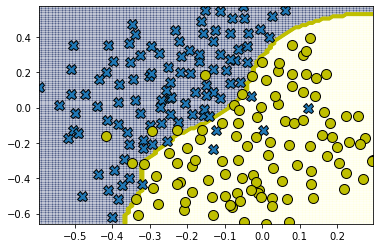

In [10]:
C , sigma = dataset3Params(X, y, Xval, yval)
model = utils.svmTrain(X, y, C, gaussianKernel, args = (sigma,))
utils.visualizeBoundary(X, y, model)
print(C,sigma)

In [11]:
#SPAM CLASSIFICATION


In [14]:
def processEmail(email_contents, verbose=True):
    """
    Preprocesses the body of an email and returns a list of indices 
    of the words contained in the email.    
    
    Parameters
    ----------
    email_contents : str
        A string containing one email. 
    
    verbose : bool
        If True, print the resulting email after processing.
    
    Returns
    -------
    word_indices : list
        A list of integers containing the index of each word in the 
        email which is also present in the vocabulary.
    
    Instructions
    ------------
    Fill in this function to add the index of word to word_indices 
    if it is in the vocabulary. At this point of the code, you have 
    a stemmed word from the email in the variable word.
    You should look up word in the vocabulary list (vocabList). 
    If a match exists, you should add the index of the word to the word_indices
    list. Concretely, if word = 'action', then you should
    look up the vocabulary list to find where in vocabList
    'action' appears. For example, if vocabList[18] =
    'action', then, you should add 18 to the word_indices 
    vector (e.g., word_indices.append(18)).
    
    Notes
    -----
    - vocabList[idx] returns a the word with index idx in the vocabulary list.
    
    - vocabList.index(word) return index of word `word` in the vocabulary list.
      (A ValueError exception is raised if the word does not exist.)
    """
    # Load Vocabulary
    vocabList = utils.getVocabList()

    # Init return value
    word_indices = []

    # ========================== Preprocess Email ===========================
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find(chr(10) + chr(10))
    # email_contents = email_contents[hdrstart:]

    # Lower case
    email_contents = email_contents.lower()
    
    # Strip all HTML
    # Looks for any expression that starts with < and ends with > and replace
    # and does not have any < or > in the tag it with a space
    email_contents =re.compile('<[^<>]+>').sub(' ', email_contents)

    # Handle Numbers
    # Look for one or more characters between 0-9
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)

    # Handle URLS
    # Look for strings starting with http:// or https://
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)

    # Handle Email Addresses
    # Look for strings with @ in the middle
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    # Handle $ sign
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    # get rid of any punctuation
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    # remove any empty word string
    email_contents = [word for word in email_contents if len(word) > 0]
    
    # Stem the email contents word by word
    stemmer = utils.PorterStemmer()
    processed_email = []
    for word in email_contents:
        # Remove any remaining non alphanumeric characters in word
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)

        if len(word) < 1:
            continue

        # Look up the word in the dictionary and add to word_indices if found
        
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices   
        
    
    
    

In [15]:
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    file_contents = fid.read()
    
word_indices = processEmail(file_contents)

print('------------------')
print('Word Indices')
print('-------------------')
print(word_indices)

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr
------------------
Word Indices
-------------------
[]


In [16]:
def emailFeatures(word_indices):
    
    n = 1899
    
    x = np.zeros(n)
    
    return x

In [18]:
with open(os.path.join('Data', 'emailSample1.txt')) as fid:
    
    file_contents = fid.read()
    
word_indices = processEmail(file_contents)
features = emailFeatures(word_indices)


print('\nLength of features vector: %d' %len(features))

print('Number of non-zero entries: %d' %sum(features > 0))

----------------
Processed email:
----------------
anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollar number you should checkout httpaddr or perhap amazon ec number if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr

Length of features vector: 1899
Number of non-zero entries: 0


In [19]:
data = loadmat(os.path.join('Data', 'spamTrain.mat'))
X, y = data['X'].astype(float), data['y'][:,0]

print('Training Linear SVM (spam Classification)')
print('This may take 1 to 2 minutes....\n')


C = 0.1
model = utils.svmTrain(X, y, C ,utils.linearKernel)

Training Linear SVM (spam Classification)
This may take 1 to 2 minutes....



In [20]:
p = utils.svmPredict(model,X)

print('Training Accuracy: %.2f' % (np.mean(p==y) * 100))

Training Accuracy: 99.83


In [21]:
data = loadmat(os.path.join('Data', 'spamTest.mat'))
Xtest, ytest = data['Xtest'].astype(float), data['ytest'][:, 0]

print('Evaluating the trained Linear SVM on a test set.....')

p = utils.svmPredict(model, Xtest)

print('Test Accuracy: %.2f' % (np.mean(p== ytest) * 100))

Evaluating the trained Linear SVM on a test set.....
Test Accuracy: 98.70


In [22]:
idx = np.argsort(model['w'])
top_idx = idx[-15:][::-1]
vocabList = utils.getVocabList()


print('Top predictions of spam:')
print('%-15s %-15s' % ('word', 'weight'))
print('-----' + '' *12 + '------')
for word, w in zip(np.array(vocabList)[top_idx], model['w'][top_idx]):
    print('%-15s %0.2f' %(word,w))
    

Top predictions of spam:
word            weight         
-----------
our             0.50
click           0.47
remov           0.42
guarante        0.39
visit           0.37
basenumb        0.35
dollar          0.33
will            0.27
price           0.27
pleas           0.26
lo              0.25
nbsp            0.25
most            0.25
ga              0.24
al              0.24


In [ ]:
filename = os.path.join('Data', 'emailSample1.txt')

with open(filename) as fid:
    file_contents = fid.read()

word_indices = processEmail(file_contents, verbose=False)
x = emailFeatures(word_indices)
p = utils.svmPredict(model, x)

print('\nProcessed %s\nSpam Classification: %s' % (filename, 'spam' if p else 'not s))